In [149]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

# Week 3

## Empirical rule and Z-score

**Z-score**
How many standard deviations aways from mean a value is?

$$
zscore(x) = \frac{x - \mu}{\sigma}
$$

## CDF and PDF

> TODO

**How to plot distributions:**
```python
sns.distplot() # All variations of distribution plot
sns.histplot() # default - histogram
sns.kdeplot()  # kind='kde' - kernel density estimation (smooth line)
sns.ecdfplot() # kind='exdf' - empirical cumulative distribution function
sns.rugplot()  # different, show ticks for each data point
```

For multiple distributions use:
```python
sns.violinplot()
```

RAW


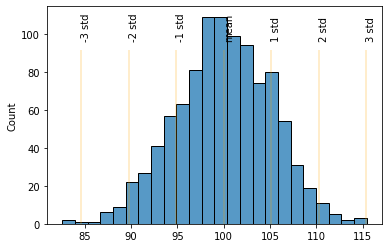

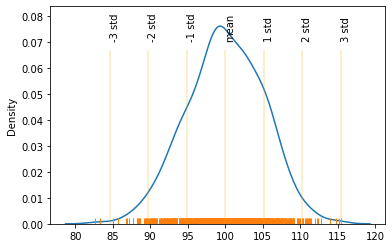

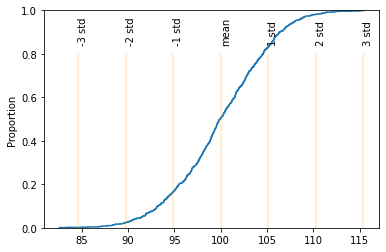

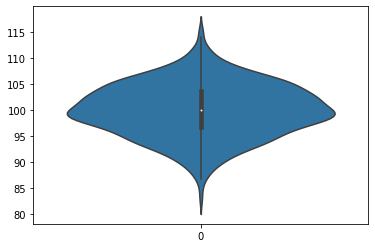

STANDARDIZED


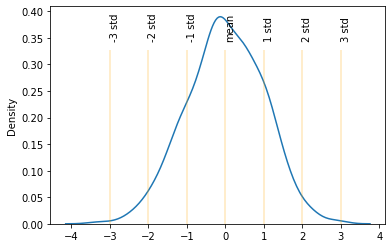

In [148]:
def standardize(x):
    mean = np.mean(x)
    std = np.std(x)
    inner = lambda x: (x - mean) / std
    return inner(x)


def add_empirical_rule_annotations(ax, x):
    std = np.std(x)
    mean = np.mean(x)

    x_bound = [mean + i * std for i in range(-3, 4)]
    y_bound = ax.get_ylim()

    ax.vlines(x=x_bound, ymin=y_bound[0], ymax=y_bound[1] * 0.8, color="orange", lw=2, alpha=0.2)
    for idx, x in enumerate(x_bound):
        text = f"{idx - 3} std" if idx != 3 else "mean"
        ax.annotate(text=text, xy=(x, (y_bound[1] - y_bound[0]) * 0.85 + y_bound[0]), rotation=90)


n = 1000
mu, std = 100, 5

print("RAW")
measured = np.random.normal(mu, std, n)
ax = sns.histplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

# This is how to combine plots
ax = sns.kdeplot(data=measured)
ax = sns.rugplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

ax = sns.ecdfplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

ax = sns.violinplot(data=measured)
plt.show()

print("STANDARDIZED")
standardized = standardize(measured)
ax = sns.kdeplot(data=standardized)
add_empirical_rule_annotations(ax, standardized)
plt.show()

In [73]:
# Shorthand for z-scores
x = np.random.normal(2, 0.5, 5)
z = stats.zscore(x)
print(x)
print(z)

[1.73402166 1.18811418 2.3798028  1.612543   1.20158917]
[ 0.25395626 -0.99719208  1.73400191 -0.02445691 -0.96630917]


## Normal approximation



## Binomial setting and Normal approximation

**Example:**

What is the probability of it most $l$ successes from $n$ attempts.
This is $l$ binomial settings that we can not sum together since they are not mutually exclusive and we would have to use *PIE* - *Principle of Inclusion and Exclusion*.

Or we can approximate it, given that the binomial curve is similar to normal curve, something like $n>50$ and use normal approximation to determine this probability.

In [102]:
# TODO create binomial setting and compare number of draws to normal distribution

n = 50
k = 4
math.comb(n, k)

#np.random.binomial()

230300

## Population, Parameters, Statistics, Samples and Standard Errors

* population - population with parameters e.g. mu, std
* parameter - property of population we want to estimate e.g. mean, std
* statistics - value we estimate from sample
* sample - draw from population
* standard error (SE) - SE of statistics tells us how far off statistics is from its expected value - TRUE value of parameter
    - $SE(x_n) = \sigma / \sqrt(n)$ -> **Squared root law** where $x_n$ bar is mean of sample of size $n$ from population ($\mu$, $\sigma$)
    - it is *not* affected by the size of the population itself just by the size of the sample
    - i.e. it gives us formula to get the sample size we want given the precision we want (assuming we know $\sigma$)

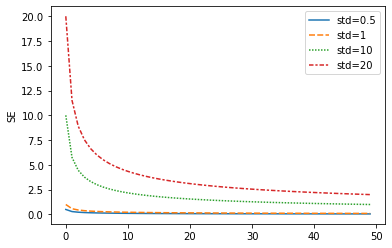

In [146]:
stds = [0.5, 1, 10, 20]
sample_size = np.linspace(1, 100)

df = pd.DataFrame({"sample_size": sample_size})
for std in stds:
    df[f"std={std}"] = std / np.sqrt(sample_size)

# TODO: Learn to pivot or use wide-dataframes
df["sample_size"] = df.sample_size.astype("category")
ax = sns.lineplot(data=df)

# Combine lineplots this way, but it doesn't show legend
# for std in stds:
#     ax = sns.lineplot(x="sample_size", y=f"std={std}", data=df, legend="")

ax.set(ylabel="SE")
plt.show()

## EV and SE of Sum, Percentages

**Sums**

If we are interested in sum of $n$ draws $S_n$ rather than the average $\bar{x_n}$?

$$
S_n = n * x_n
\\
E(S_n) = n * mu
\\
SE(S_n) = sqrt(n) * std
\\
$$

Careful that while with the increasing sample size $n$ the $SE(x_n)$ goes down the $SE(S_n)$ increases.


**Percentages**

*Question:* What percentage of likely voters approve of the way the US Presedent is handling his job?

Each voter either approves (labeled `1`) or not (labeled `0`). Then the answer is the sum of all the labels.

$S_n$ is the number of voters that approve.

$$
E(\text{percentage of 1s}) = \mu * 100\%
\\
SE(\text{percentage of 1s}) = \frac{\sigma}{\sqrt{n}} * 100\%
$$

These hold only for draw with replacement, however with small $\text{sample\_size} / \text{population\_size}$ it is alright.

**Expected Value and Standard Error**

Fox variable $x$ that has $k$ possible values - $x_1, x_2, ... x_k$

$$
E(\mu) = \frac{\sum_{i}[P(x_i) * x_i])}{n}
\\
E(sum) = n * \mu
$$

And its Standard Error

$$
\sigma^2 = \sum_{i=1}^n (x_i - x_n)^2 * P(x_i)
\\
SE(sum) = \sqrt{n} * \sigma
$$


## Three types of histograms

1. Probability histogram
2. Sample histogram / Empirical histogram of real data
3. Probability histogram of statistics e.g. $S_{100} = \text{number of tails in 100 throws}$

## Law of Large numbers

> The square root law says that $SE(x_n)$, the standard error of the sample mean, goes to zero as the sample size increases.
> Therefore the $x_n$ will be close to its expected value $\mu$ if the sample size is large.

It applies to averages and therefore also percentages but not for sums as their SE increases.
This has to be sampling with replacement.

## Central Limit Theorem

> When sampling with replacement and $n$ is *large*, then the sampling distribution of the sample sum (or average or percentage) approximately follows the normal curve.

* statistics has to be sum, however averages and percentages are also sums so we can use CLT.
* thus for random variable $X$ representing some statistics we can use normal approximation - to standardize $z_i = \frac{x_i - E(X)}{SE(X)}$
* the more skewed the population distribution is the bigger sample size $n$ we need

# Week 4 - predictions, regression

## Correlation coefficient

$$
r = \frac{1}{n} * \sum_{i=1}^{n} \frac{x_i - x_n}{\sigma_x} * \frac{y_i - y_n}{\sigma_y}
  = \frac{1}{n} * \sum_{i=1}^n zscore(x_i) * zscore(y_i)
$$

If both $x$ and $y$ are above/below their respective mean correlation coefficient is positive otherwise it is negative.

r = 0.92
corrcoef = 0.92


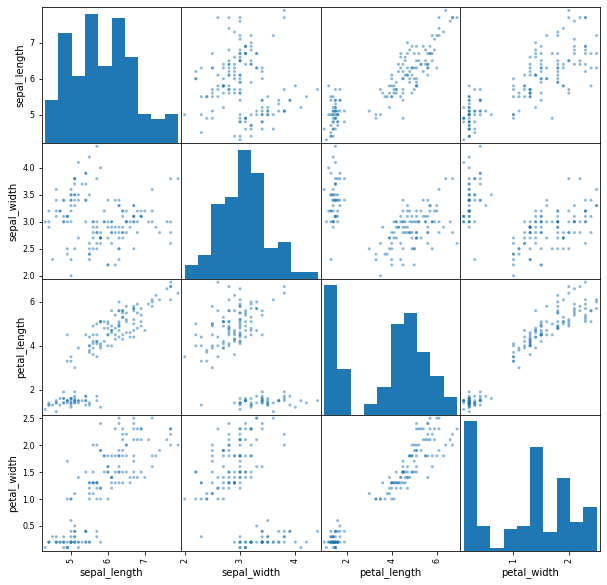

In [129]:
def correlattion_coefficient(x, y):
    return sum(standardize(x) * standardize(y)) / n

n = 50
x = np.linspace(0, 10, n)
y = x**2 + np.random.uniform(-20, 20, n)

print(f"r = {correlattion_coefficient(x, y):.2f}")
print(f"corrcoef = {np.corrcoef(x, y)[0,1]:.2f}")

from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, figsize=(10, 10))
plt.show()


<AxesSubplot:>

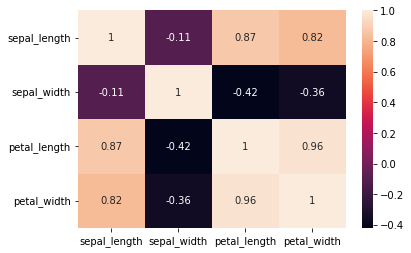

In [124]:
# Simple way to view correlation
sns.heatmap(iris_df.corr(), annot=True)

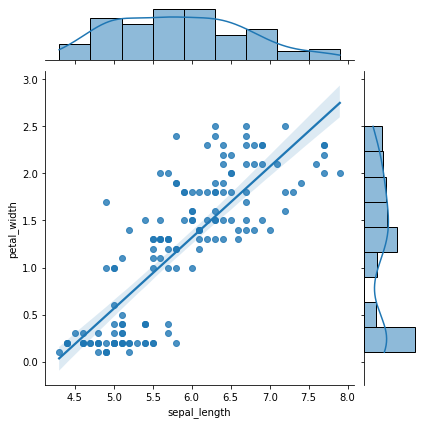

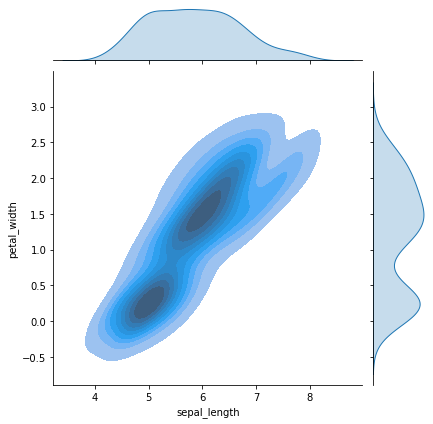

In [118]:
sns.jointplot(x='sepal_length', y='petal_width', data=iris_df, kind='reg')
sns.jointplot(x='sepal_length', y='petal_width', data=iris_df, kind='kde', fill=True)

## Regression line

Given data $(x_1, y_1), (x_2, y_2),... (x_n, y_n)$ line that goes through these points is a regression line.

Its descriptions would be $\hat{y_i} = a + b * x_i$.
* $y_i$ is the observed value
* $\hat{y_i}$ estimate of $y_i$ given by the regression line

One way to find $a$ and $b$ is to use the least square distnace method:

### Method of least squares - regression line

$$
\text{minimize: } \sum_{i=1}^n (y_i - \hat{y_i})^2 = \sum_{i=1}^n (y_i - (a + b * x_i))^2
$$


Somehow it holds that:
$$
b = r * \frac{s_y}{s_x}
\\
a = \hat{y} + b \hat{x}
$$

Predictions of $y$ for given $x$ thus needs - $s_x, s_y, \hat{x}, \hat{y}$

### Regression towards mean

For $x=\bar{x} \implies \hat{y}=\bar{y}$

$$
\hat{y} = a + bx = \bar{y} - b \bar{x} + b \bar{x} = \bar{y}
$$

> Q: If we were to move 1 standard deviation from $\bar{x}$ how would $\hat{y}$ change?

$$
\text{For } x = \bar{x} + s_x
\\
\hat{y} = a + bx = a + r \frac{s_y}{s_x} (\bar{x} + s_x) = a + b \bar{x} + r s_y
$$

> A: If $x$ increases by $s_x$, $\bar{y}$ changes by $r s_y$

And since $s_y \in [-1, 1]$ change in $\hat{y}$ is smaller than change in $x$ scaled to respective standard deviations.
It means that the line is made in a way that given points would be "going" towards mean - e.g. if you've scored the best on the midterm you won't be best on the finals.
